# Case Study: Andy Warhol

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
# Load data
data = pd.read_csv('data/auction_data_cleaned.csv', index_col=0)
data.head()

,artist_name,title,date,medium,dims,auction_date,auction_house,auction_sale,auction_lot,price_realized,...,auction_year,price_realized_USD_constant_2022,area_cm_sq,volume_cm_cu,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Fillette au bateau (Maya),1938,oil on canvas,73.3 x 60 cm,"Mar 1, 2023",Sotheby's• London,Modern & Contemporary Evening Auction,Lot6002,NaN,...,2023,NaN,4398.00,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Homme assis,1969,oil on panel laid down on cradled panel,28.7 x 56.6 cm,"Nov 30, 2022",Christie's,Live Auction 19901 20th/21st Century Art Eveni...,Lot35,"HK\$10,650,000• US\$1,363,489",...,2022,1363489.0,1624.42,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Buffalo Bill,1911,oil and sand on canvas,33.3 x 46.3 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot12,"US\$12,412,500",...,2022,12412500.0,1541.79,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Homme à la moustache,1970,oil and oil stick on panel,65.1 x 129.4 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot30,"US\$4,620,000",...,2022,4620000.0,8423.94,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Le peintre et son modèle,1964,oil and ripolin on canvas,195.0 x 130.0 cm,"Nov 17, 2022",Christie's,Live Auction 20988 20th Century Evening Sale,Lot36,"US\$10,351,500",...,2022,10351500.0,25350.00,NaN,0,49.0,NaN,83.0,58.0,1


In [3]:
# View columns
data.columns

Index(['artist_name', 'title', 'date', 'medium', 'dims', 'auction_date',
       'auction_house', 'auction_sale', 'auction_lot', 'price_realized',
       'estimate', 'bought_in', 'Nationality', 'Gender', 'birth_year',
       'death_year', 'auction_date_parsed', 'start_date', 'end_date',
       'dims_cm', 'dims_in', 'dims_mm', 'is_diameter', 'width_cm', 'height_cm',
       'depth_cm', 'width_mm', 'height_mm', 'depth_mm', 'width_in',
       'height_in', 'depth_in', 'auction_house_loc', 'auction_house_name',
       'price_realized_USD', 'auction_year',
       'price_realized_USD_constant_2022', 'area_cm_sq', 'volume_cm_cu',
       'living', 'years_after_death_of_auction', 'artist_age_at_auction',
       'artist_age_at_artwork_completion', 'artwork_age_at_auction',
       'years_ago_of_auction'],
      dtype='object')

In [4]:
# Isolate columns we want
cols = [
    'artist_name', 'Nationality', 'Gender', 'birth_year', 'death_year',
    'title', 'medium', 'start_date', 'end_date',
    'dims', 'dims_cm','is_diameter',
    'width_cm', 'height_cm','depth_cm',
    'area_cm_sq', 'volume_cm_cu',
    'auction_date_parsed','auction_year','auction_house_loc', 'auction_house_name',
    'price_realized_USD','price_realized_USD_constant_2022','bought_in',   
    'living', 'years_after_death_of_auction', 'artist_age_at_auction',
    'artist_age_at_artwork_completion', 'artwork_age_at_auction',
    'years_ago_of_auction'
]

data = data[cols]
data.head()

,artist_name,Nationality,Gender,birth_year,death_year,title,medium,start_date,end_date,dims,...,auction_house_name,price_realized_USD,price_realized_USD_constant_2022,bought_in,living,years_after_death_of_auction,artist_age_at_auction,artist_age_at_artwork_completion,artwork_age_at_auction,years_ago_of_auction
0,Pablo Picasso,Spanish,Male,1881.0,1973.0,Fillette au bateau (Maya),oil on canvas,1938.0,1938.0,73.3 x 60 cm,...,Sotheby's,NaN,NaN,NaN,0,50.0,NaN,57.0,85.0,0
1,Pablo Picasso,Spanish,Male,1881.0,1973.0,Homme assis,oil on panel laid down on cradled panel,1969.0,1969.0,28.7 x 56.6 cm,...,Christie's,1363489.0,1363489.0,NaN,0,49.0,NaN,88.0,53.0,1
2,Pablo Picasso,Spanish,Male,1881.0,1973.0,Buffalo Bill,oil and sand on canvas,1911.0,1911.0,33.3 x 46.3 cm,...,Christie's,12412500.0,12412500.0,NaN,0,49.0,NaN,30.0,111.0,1
3,Pablo Picasso,Spanish,Male,1881.0,1973.0,Homme à la moustache,oil and oil stick on panel,1970.0,1970.0,65.1 x 129.4 cm,...,Christie's,4620000.0,4620000.0,NaN,0,49.0,NaN,89.0,52.0,1
4,Pablo Picasso,Spanish,Male,1881.0,1973.0,Le peintre et son modèle,oil and ripolin on canvas,1964.0,1964.0,195.0 x 130.0 cm,...,Christie's,10351500.0,10351500.0,NaN,0,49.0,NaN,83.0,58.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53034 entries, 0 to 53033
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   artist_name                       53034 non-null  object 
 1   Nationality                       53034 non-null  object 
 2   Gender                            53034 non-null  object 
 3   birth_year                        53034 non-null  float64
 4   death_year                        37116 non-null  float64
 5   title                             51646 non-null  object 
 6   medium                            53020 non-null  object 
 7   start_date                        33198 non-null  float64
 8   end_date                          33198 non-null  float64
 9   dims                              51643 non-null  object 
 10  dims_cm                           27773 non-null  object 
 11  is_diameter                       53034 non-null  bool   
 12  widt

In [6]:
# Parse `auction_date_parsed` as DateTime object
data['auction_date_parsed'] = pd.to_datetime(data['auction_date_parsed'])

In [7]:
# Establish palette
pink = '#FE5F55'
blue = '#208AAE'
green = '#18A999'
yellow = '#F0F3BD'
darkblue = '#00072D'
purple = '#9368B7'
tan = '#F2B880'
pinklav = '#EFC3E6'
red = '#C44536'
hunter = '#4B644A'

colors = [pink, blue, green, purple, tan, red, pinklav, yellow, hunter, darkblue]

mypalette = sns.set_palette(sns.color_palette(colors))
sns.color_palette(colors)

[(0.996078431372549, 0.37254901960784315, 0.3333333333333333),
 (0.12549019607843137, 0.5411764705882353, 0.6823529411764706),
 (0.09411764705882353, 0.6627450980392157, 0.6),
 (0.5764705882352941, 0.40784313725490196, 0.7176470588235294),
 (0.9490196078431372, 0.7215686274509804, 0.5019607843137255),
 (0.7686274509803922, 0.27058823529411763, 0.21176470588235294),
 (0.9372549019607843, 0.7647058823529411, 0.9019607843137255),
 (0.9411764705882353, 0.9529411764705882, 0.7411764705882353),
 (0.29411764705882354, 0.39215686274509803, 0.2901960784313726),
 (0.0, 0.027450980392156862, 0.17647058823529413)]

In [8]:
# Slice Warhol-specific data
warhol = data[data['artist_name'] == 'Andy Warhol'].copy()

# A Note on Methodology: Constant vs. Nominal Dollars
In most of what follows, I've decided to do preliminary data analysis for patterns and trends using constant 2022 dollars rather than nominal dollars from each observation's given auction year. My reason for doing this is to eliminate the inflation variable as much as possible so that we can attempt to measure realized price accoring to a single standard. Otherwise, any attempt to look for correlations between a certain variable and price realized would be confounded by auction date. For instance, consider an artwork sold in 1989 for a relatively high price and an artwork solid in 2020 for a relatively low price: due to inflaction, these two prices might be the same, and we will have lost the ability to see their difference. We want to eliminate this possibility to the extent that we can.

Not always, though. Ultimately I do want my model to predict prices in nominal amounts--that is, I want the model to predict the price for a work sold in 1990 in nominal 1990 dollars. But again, my sense is that I'll have an easier time understanding general trends and patterns in the data if I adjust for inflation. As a result, I'll use the `price_realized_USD_constant_2022` feature that I engineered so that I'm dealing with constant 2022 USD amounts.

# Realized Price Distribution
The first thing I want to do is get a sense of how realized price is distributed for Warhol.

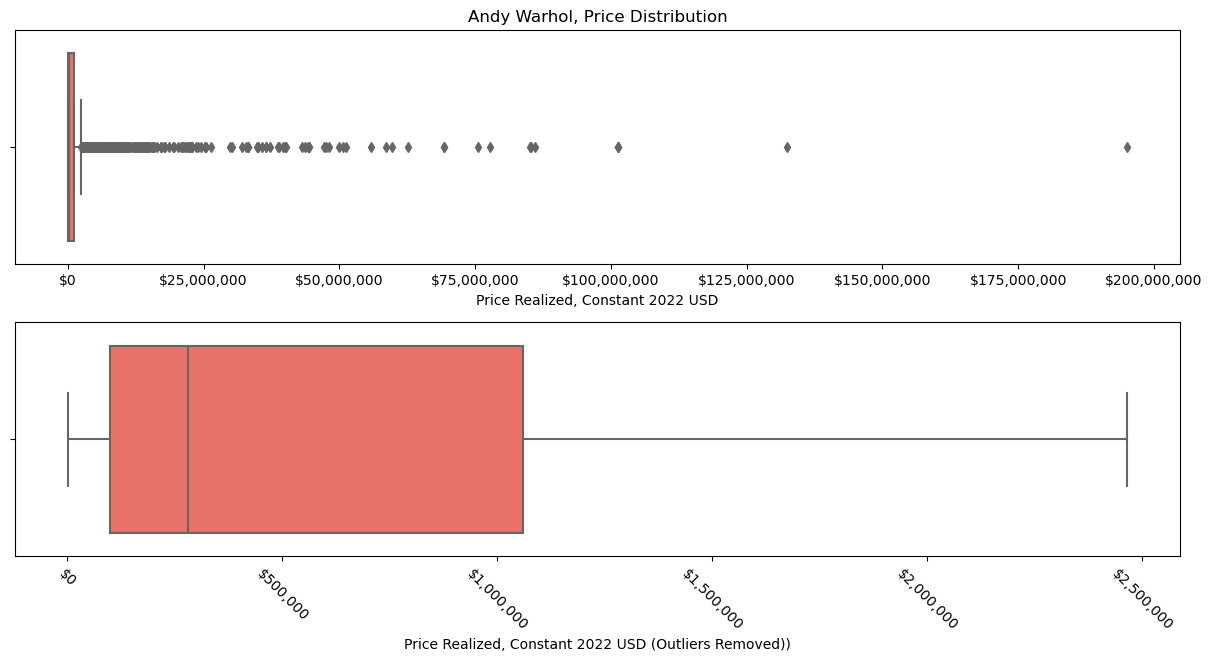

In [9]:
warhol = data[data['artist_name'] == 'Andy Warhol']

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    ax=axs[0]
)

sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=axs[1]
)

fig.tight_layout()
axs[0].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[1].get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
axs[1].tick_params(axis='x', rotation=-45)

axs[0].set_title('Andy Warhol, Price Distribution')
axs[0].set_xlabel('Price Realized, Constant 2022 USD')
axs[1].set_xlabel('Price Realized, Constant 2022 USD (Outliers Removed))');

As we can see, the distribution has an aggressive positive skew, with one sale approaching \\$200M--much higher than the median sale price, which looks closer to \\$300k or so.

Let's view the distribution as a histogram.

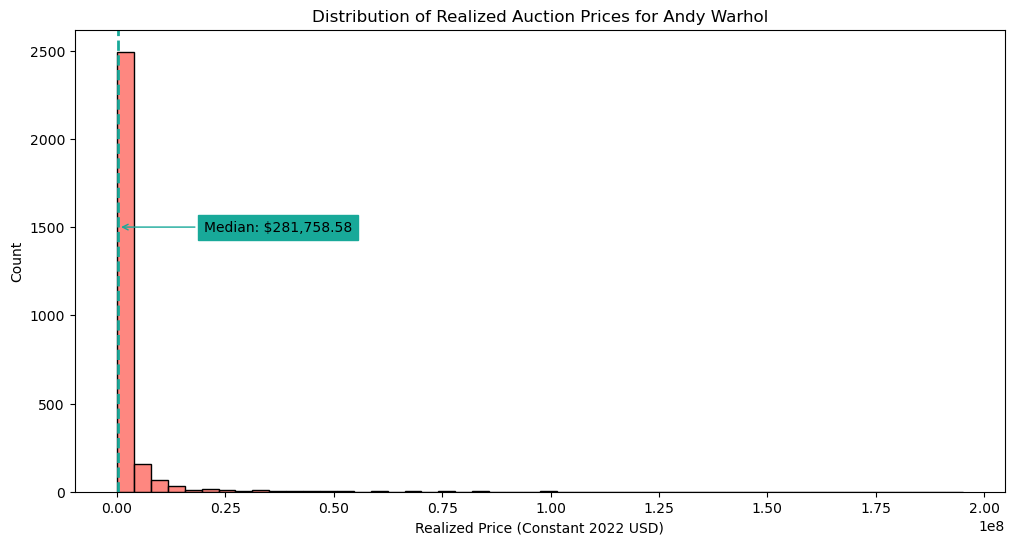

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

warhol_median = np.median(warhol['price_realized_USD_constant_2022'].dropna())

sns.histplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    bins=50,
    ax=ax
)

# Median line
ax.axvline(warhol_median, color=green, ls='--', lw=2)
ax.annotate(
    'Median: ${:,.2f}'.format(warhol_median), xy=(warhol_median, 1500), 
    xycoords='data', xytext=(20_000_000, 1500), 
    textcoords='data', arrowprops=dict(edgecolor=green, arrowstyle='->'), backgroundcolor=green,
    horizontalalignment='left', verticalalignment='center'
)

ax.set_title("Distribution of Realized Auction Prices for Andy Warhol")
ax.set_xlabel("Realized Price (Constant 2022 USD)");

It's almost pointless to look at this chart, since there's so little information. As a result, I'm going to plot the log of the realized price in hopes that it will lead to a better distribution.

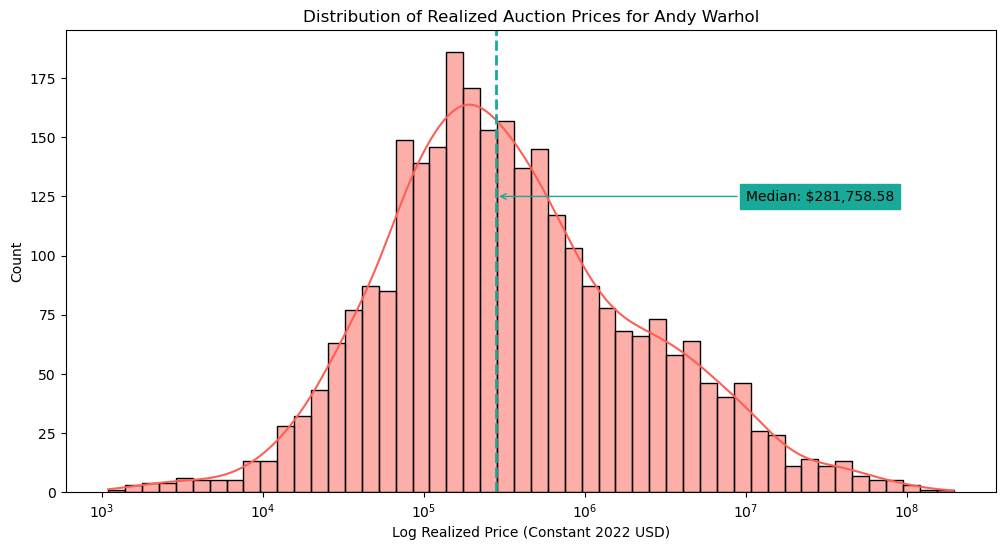

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

warhol_median = np.median(warhol['price_realized_USD_constant_2022'].dropna())

sns.histplot(
    x=np.log10(warhol['price_realized_USD_constant_2022']),
    bins=50,
    kde=True,
    ax=ax
)

# Median line
ax.axvline(np.log10(warhol_median), color=green, ls='--', lw=2)
ax.annotate(
    'Median: ${:,.2f}'.format(warhol_median), xy=(np.log10(warhol_median), 125), 
    xycoords='data', xytext=(7, 125), 
    textcoords='data', arrowprops=dict(edgecolor=green, arrowstyle='->'), backgroundcolor=green,
    horizontalalignment='left', verticalalignment='center'
)

ax.set_title("Distribution of Realized Auction Prices for Andy Warhol")
ax.set_xlabel("Log Realized Price (Constant 2022 USD)")

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'));

Suddenly we have what looks like a very symmetrical distribution indeed, which makes me suspect that we'll have better luck predicting not the realized price but its log.

# Realized Price vs. Artwork Size
Does size matter in Warhol's case?

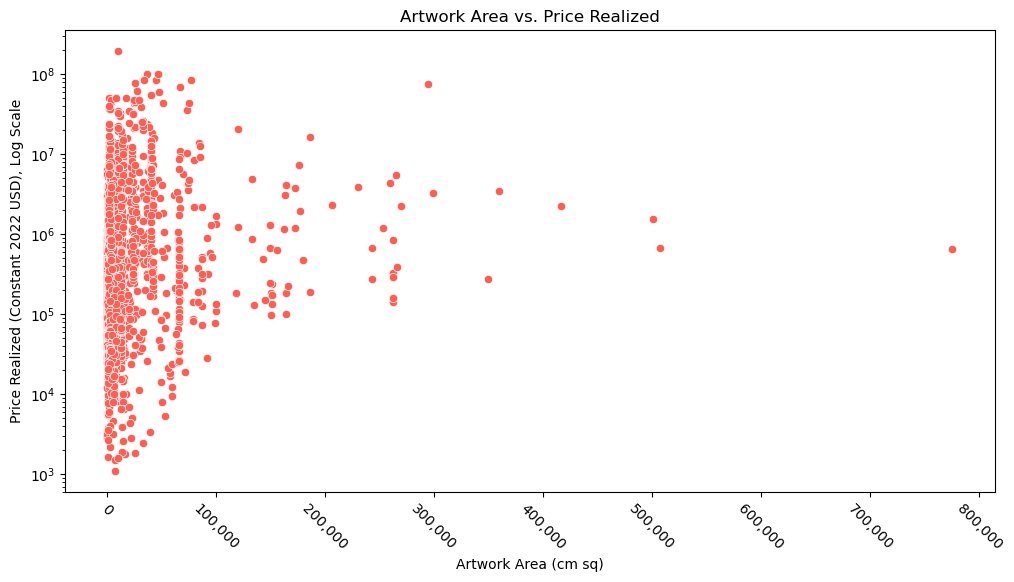

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    data=warhol,
    y='price_realized_USD_constant_2022',
    x='area_cm_sq',
    ax=ax
)

ax.set_title('Artwork Area vs. Price Realized')
ax.set_xlabel('Artwork Area (cm sq)')
ax.set_ylabel('Price Realized (Constant 2022 USD), Log Scale')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_yscale('log')
ax.tick_params(axis='x', rotation=-45);

Interestingly it looks like `area_cm_sq` may also have an aggressive positive skew. Before continuing, let's have a look at the distributions of sizes.

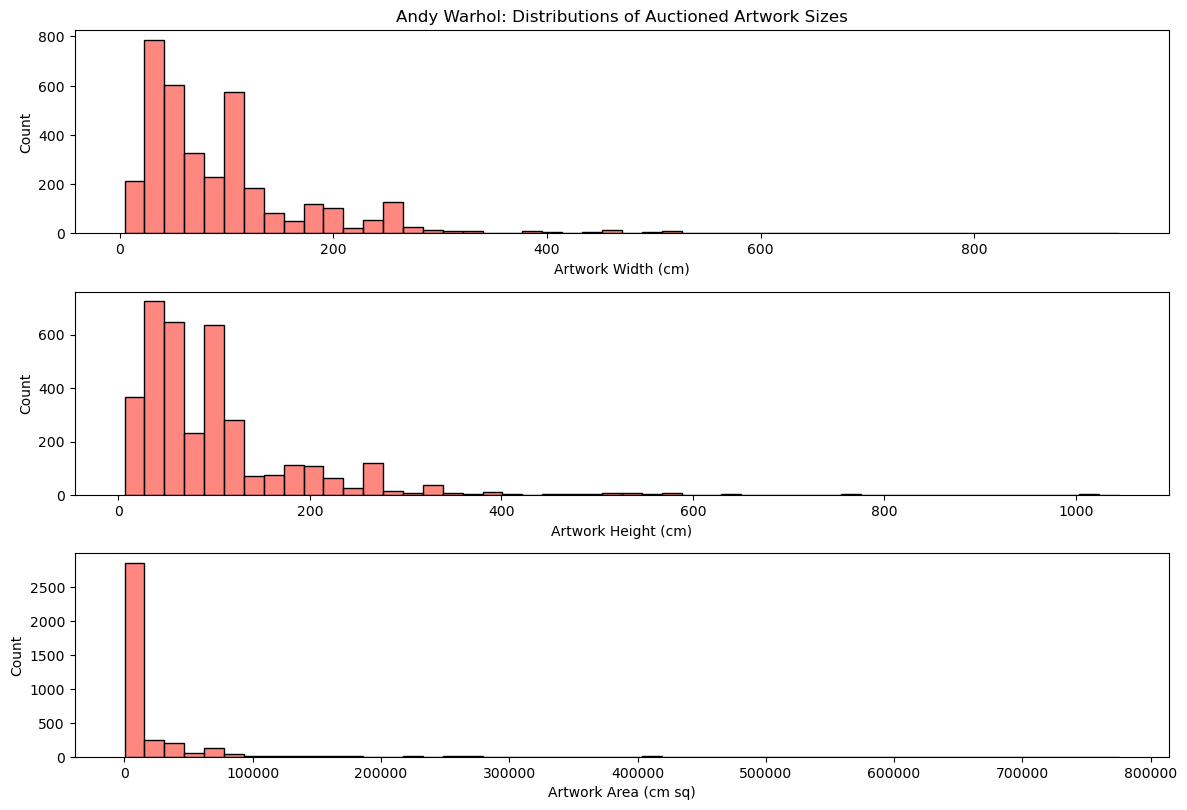

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Width
sns.histplot(
    data=warhol,
    x='width_cm',
    bins=50,
    ax=axs[0]
)

# Height
sns.histplot(
    data=warhol,
    x='height_cm',
    bins=50,
    ax=axs[1]
)

# Area
sns.histplot(
    data=warhol,
    x='area_cm_sq',
    bins=50,
    ax=axs[2]
)

fig.tight_layout()

axs[0].set_title("Andy Warhol: Distributions of Auctioned Artwork Sizes")
axs[0].set_xlabel("Artwork Width (cm)")
axs[1].set_xlabel("Artwork Height (cm)")
axs[2].set_xlabel("Artwork Area (cm sq)");

Now let's see if taking the log of these dimensions helps us see the distribution better.

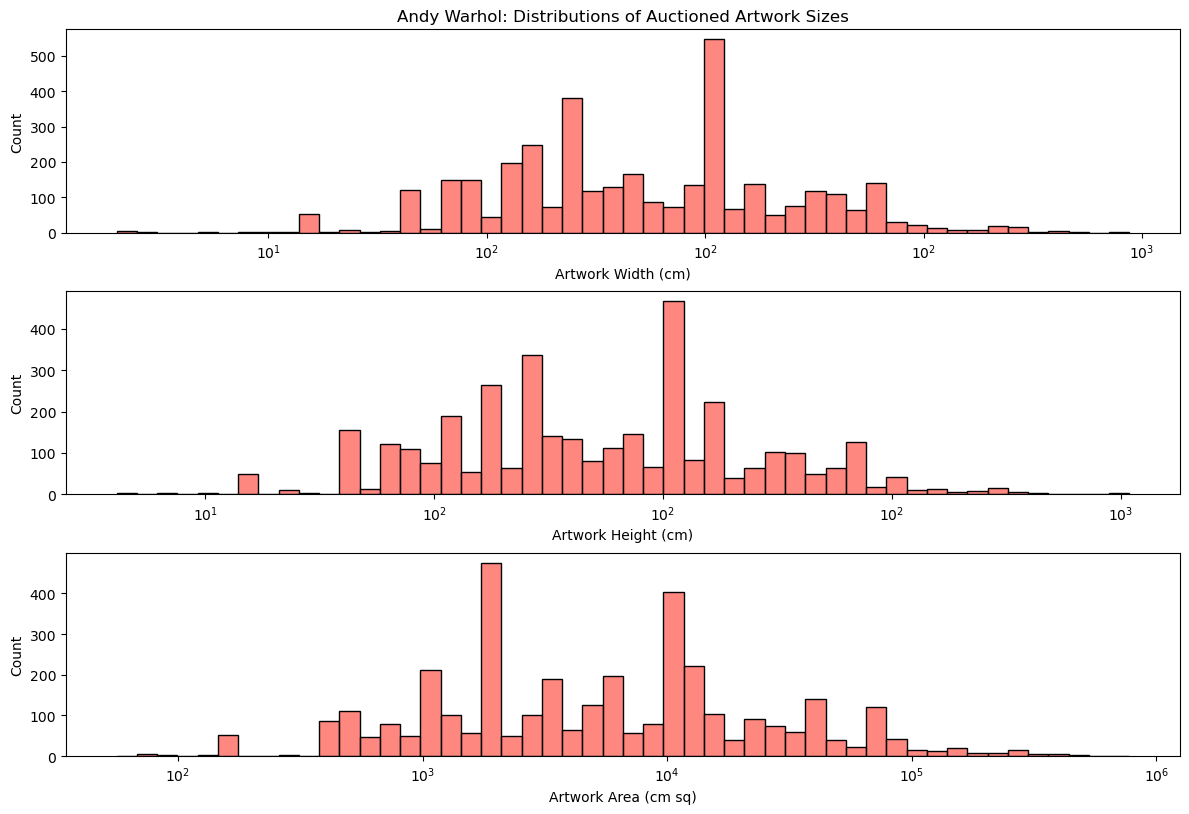

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# Width
sns.histplot(
    x=np.log10(warhol['width_cm']),
    bins=50,
    ax=axs[0]
)

# Height
sns.histplot(
    x=np.log10(warhol['height_cm']),
    bins=50,
    ax=axs[1]
)

# Area
sns.histplot(
    x=np.log10(warhol['area_cm_sq']),
    bins=50,
    ax=axs[2]
)

fig.tight_layout()

axs[0].set_title("Andy Warhol: Distributions of Auctioned Artwork Sizes")
axs[0].set_xlabel("Artwork Width (cm)")
axs[1].set_xlabel("Artwork Height (cm)")
axs[2].set_xlabel("Artwork Area (cm sq)")

# Format log scale
for ax in axs:
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'))

Yes indeed. So when it comes time to train the model, I'll train it on log versions of these dimsneions features.

With this in mind, let's plot artwork size--width, height, and area--vs. realized price, with a log scale for both variables.

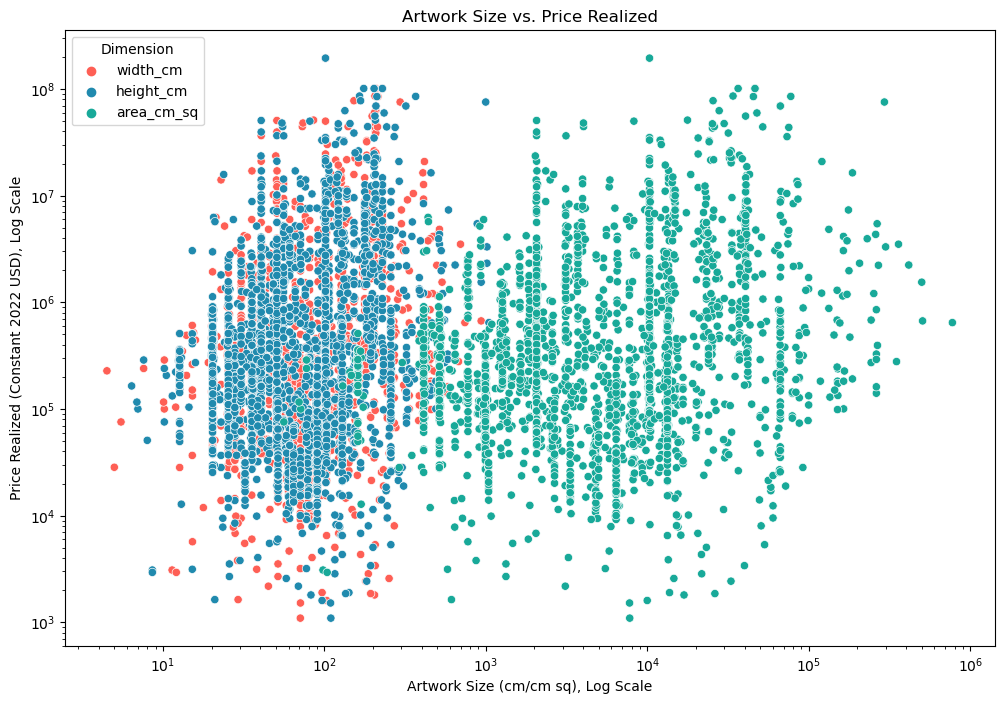

In [15]:
df = (
    warhol[['price_realized_USD_constant_2022', 'width_cm', 'height_cm', 'area_cm_sq']]
    .melt(
        id_vars='price_realized_USD_constant_2022', var_name='Dimension', value_name='cm/cm sq'
    )
)

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(
    data=df,
    y='price_realized_USD_constant_2022',
    x='cm/cm sq',
    hue='Dimension',
    ax=ax,
)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_title('Artwork Size vs. Price Realized')
ax.set_xlabel('Artwork Size (cm/cm sq), Log Scale')
ax.set_ylabel('Price Realized (Constant 2022 USD), Log Scale');

There doesn't seem to be much correlation here, but let's check again with a regression line.

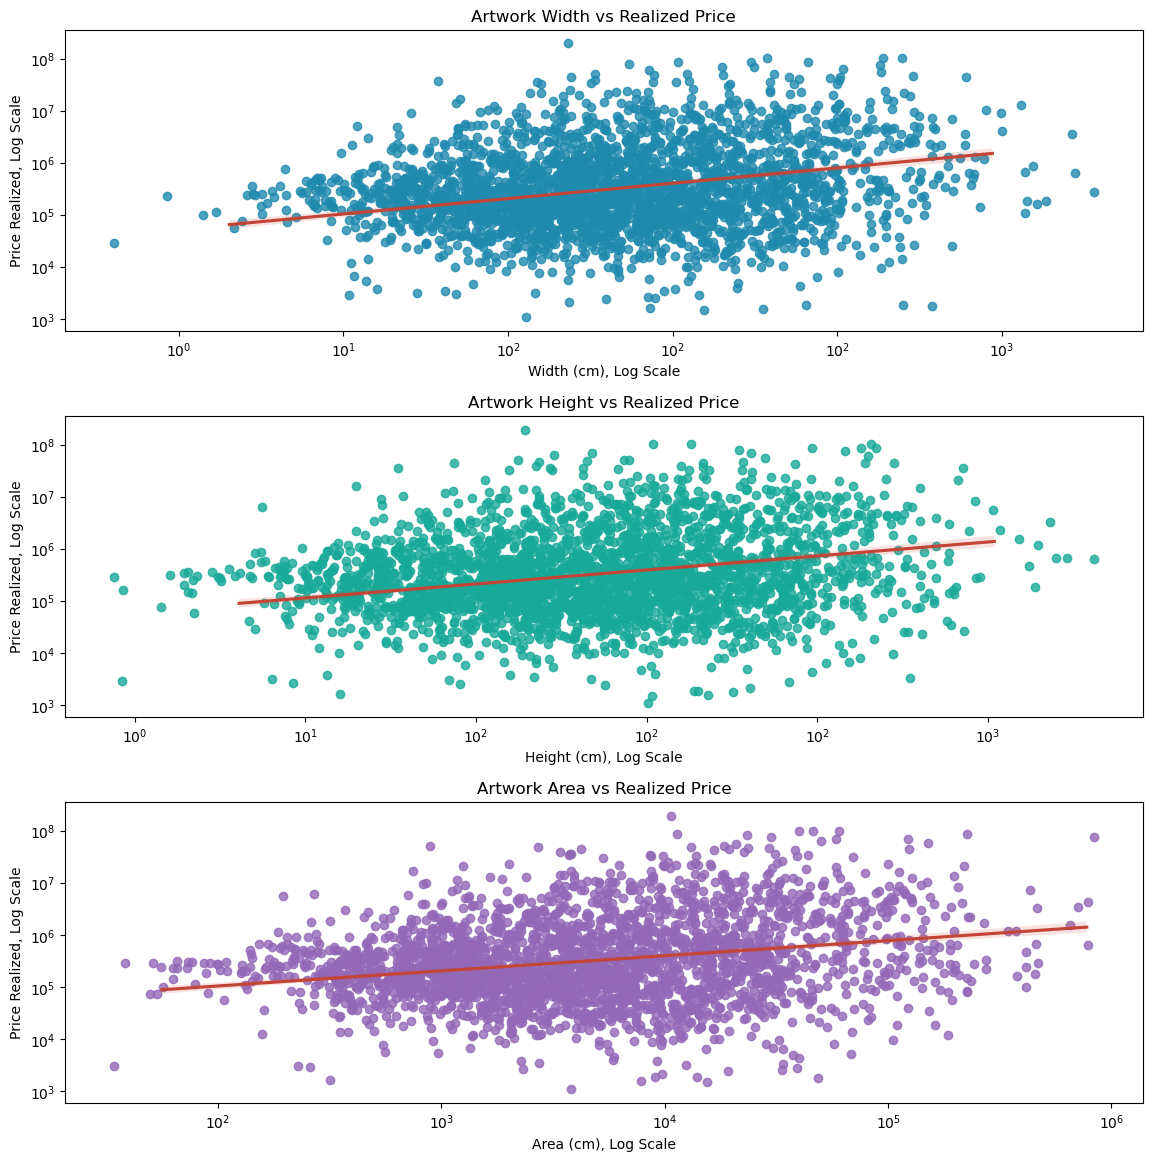

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(12, 12))

# Width
sns.regplot(
    x=np.log10(warhol['width_cm']),
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=axs[0],
    x_jitter=.5, line_kws=dict(color=red),
    color=blue
)

# Height
sns.regplot(
    x=np.log10(warhol['height_cm']),
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=axs[1],
    x_jitter=.5, line_kws=dict(color=red),
    color=green
)

# Area
sns.regplot(
    x=np.log10(warhol['area_cm_sq']),
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=axs[2],
    x_jitter=.5, line_kws=dict(color=red),
    color=purple
)

fig.tight_layout(pad=3)

axs[0].set_title('Artwork Width vs Realized Price')
axs[0].set_xlabel('Width (cm), Log Scale')
axs[0].set_ylabel('Price Realized, Log Scale')
axs[1].set_title('Artwork Height vs Realized Price')
axs[1].set_xlabel('Height (cm), Log Scale')
axs[1].set_ylabel('Price Realized, Log Scale')
axs[2].set_title('Artwork Area vs Realized Price')
axs[2].set_xlabel('Area (cm), Log Scale')
axs[2].set_ylabel('Price Realized, Log Scale')

for ax in axs:
    ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'))
    ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'));
    

There does seem to be some correlation between size (understood as width, height, or overall area) after all.

# Realized Price Over Time
What about looking at how realized price changes with auction year? Since we've already adjusted for inflation, any change we see *should* be due to Warhol's value increasing over time, *not* the incidental effects of inflation.

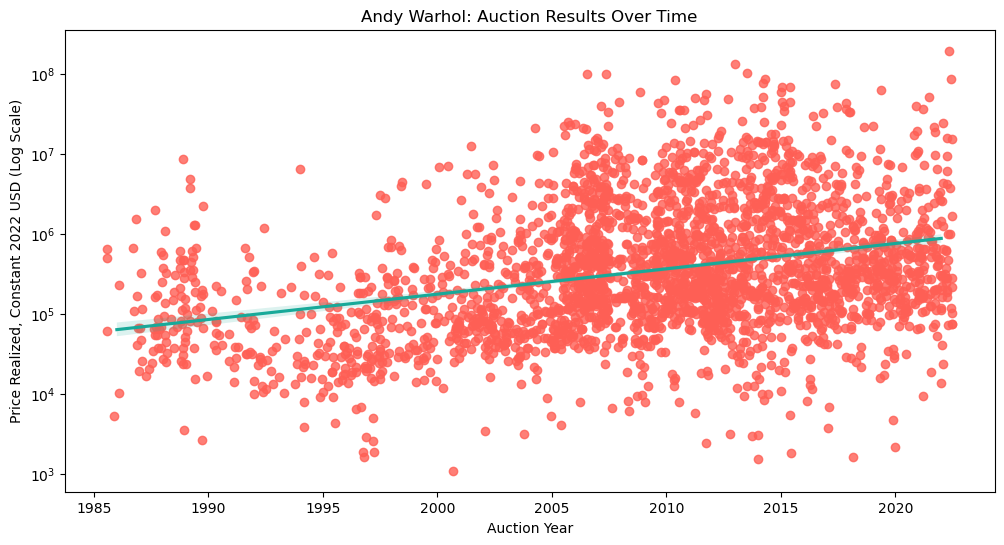

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.regplot(
    x=warhol['auction_year'],
    y=np.log10(warhol['price_realized_USD_constant_2022']),
    ax=ax,
    x_jitter=.5, line_kws=dict(color=green)
    
)

ax.set_title('Andy Warhol: Auction Results Over Time')
ax.set_xlabel('Auction Year')
ax.set_ylabel('Price Realized, Constant 2022 USD (Log Scale)')

ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('$10^{x:,.0f}$'));

There does seem to be some positive correlation here, though not as much as you might expect.

# Realized Price vs Auction House
Does realized price vary significantly from one auction house to the next?

In [18]:
# Count instances of each auction house
auction_house_counts = warhol['auction_house_name'].value_counts()

# Get auction houses above 100-count thresshold
top_auction_houses = auction_house_counts[auction_house_counts > 100].index

# Create mask for top auction houses
is_top_auction_house = warhol['auction_house_name'].isin(top_auction_houses)

# Create new feature to reduce cardinality of existing feature
warhol.loc[is_top_auction_house, 'auction_house_name_reduced'] = warhol.loc[is_top_auction_house, 'auction_house_name']
warhol.loc[~is_top_auction_house & warhol['auction_house_name'].notna(), 'auction_house_name_reduced'] = 'Other'

warhol[['auction_house_name', 'auction_house_name_reduced']].sample(10)

/var/folders/_h/vtjqyqq96hv8fw2d_ybkq1sc0000gn/T/ipykernel_32502/1089836360.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warhol.loc[is_top_auction_house, 'auction_house_name_reduced'] = warhol.loc[is_top_auction_house, 'auction_house_name']


,auction_house_name,auction_house_name_reduced
4341,Christie's,Christie's
2014,Christie's,Christie's
4997,Christie's,Christie's
3766,Christie's,Christie's
4228,Matsart Gallery,Other
2708,Christie's,Christie's
4290,Christie's,Christie's
5530,Christie's,Christie's
2873,Christie's,Christie's
4659,Christie's,Christie's


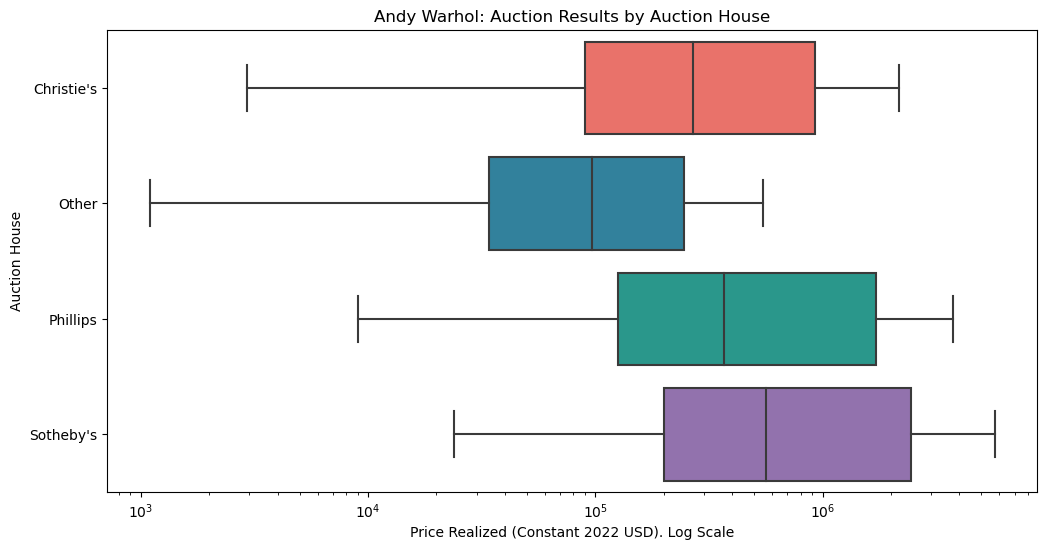

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y='auction_house_name_reduced',
    ax=ax,
    showfliers=False
)

ax.set_title('Andy Warhol: Auction Results by Auction House')
ax.set_xlabel('Price Realized (Constant 2022 USD). Log Scale')
ax.set_ylabel('Auction House')

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.set_xscale('log');

Interestingly, yes, there do seem to be differencese between various auction houses.

# Realized Price vs Auction Location
Does price vary with auction location?

In [20]:
# Count instances of each auction house
auction_loc_counts = warhol['auction_house_loc'].value_counts()

# Get auction houses above 100-count thresshold
top_auction_locs = auction_loc_counts[auction_loc_counts > 100].index

# Create mask for top auction houses
is_top_auction_loc = warhol['auction_house_loc'].isin(top_auction_locs)

# Create new feature to reduce cardinality of existing feature
warhol.loc[is_top_auction_loc, 'auction_house_loc_reduced'] = warhol.loc[is_top_auction_loc, 'auction_house_loc']
warhol.loc[~is_top_auction_loc & warhol['auction_house_loc'].notna(), 'auction_house_loc_reduced'] = 'Other'

warhol[['auction_house_loc', 'auction_house_loc_reduced']].sample(10)

/var/folders/_h/vtjqyqq96hv8fw2d_ybkq1sc0000gn/T/ipykernel_32502/1522207090.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warhol.loc[is_top_auction_loc, 'auction_house_loc_reduced'] = warhol.loc[is_top_auction_loc, 'auction_house_loc']


,auction_house_loc,auction_house_loc_reduced
4974,New York,New York
2410,New York,New York
2524,London,London
2198,NaN,NaN
3652,New York,New York
4169,London,London
3116,NaN,NaN
4453,London,London
2614,Dallas,Other
4469,Hamburg,Other


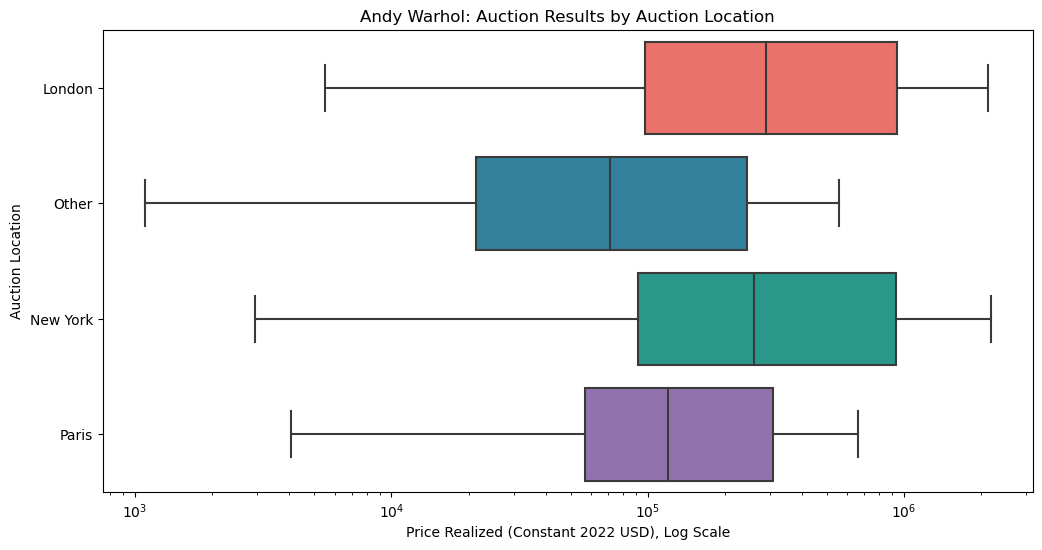

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y='auction_house_loc_reduced',
    ax=ax,
    showfliers=False
)

ax.set_title('Andy Warhol: Auction Results by Auction Location')
ax.set_xlabel('Price Realized (Constant 2022 USD), Log Scale')
ax.set_ylabel('Auction Location')

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_xscale('log');

With auction location, too, there are noticeable differences.

# Realized Price vs Auction Decade
Does price vary much from one decade to the next?

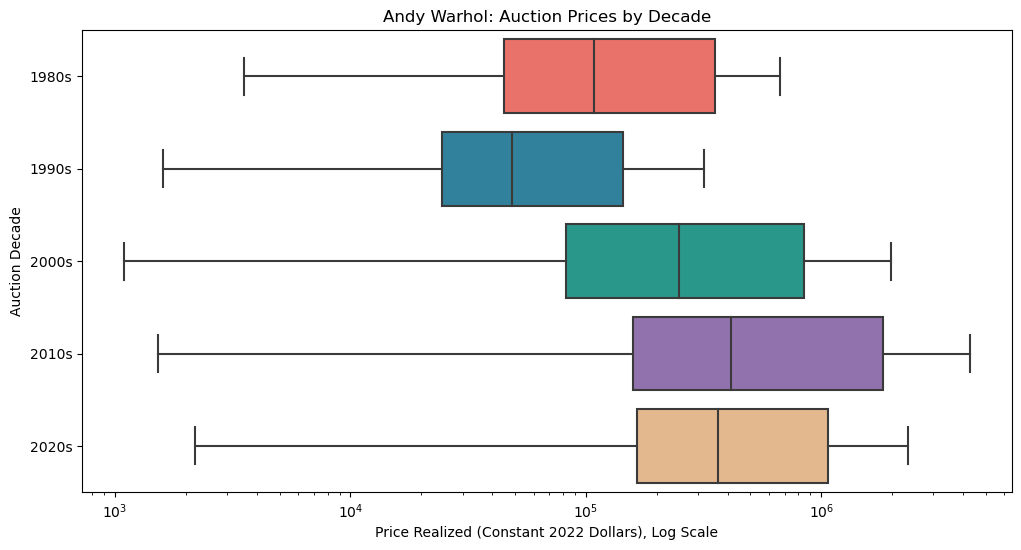

In [22]:
auction_decade = (warhol['auction_year'] // 10 * 10).astype('str') + 's'
auction_decade_order = auction_decade.unique()
auction_decade_order.sort()

fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y=auction_decade,
    ax=ax, showfliers=False, order=auction_decade_order
)

ax.get_xaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

ax.set_xlabel('Price Realized (Constant 2022 Dollars), Log Scale')
ax.set_ylabel('Auction Decade')
ax.set_title('Andy Warhol: Auction Prices by Decade')

ax.set_xscale('log');

What if we look at a more granular level, say ever 5-year window?

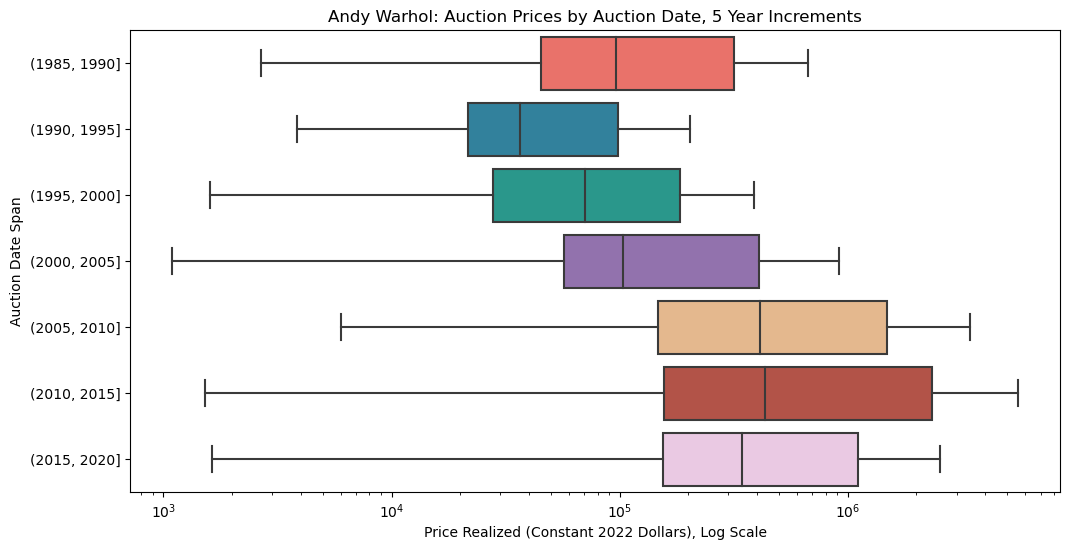

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(
    data=warhol,
    x='price_realized_USD_constant_2022',
    y=pd.cut(warhol['auction_year'], bins=range(1985, 2025, 5)),
    ax=ax, showfliers=False
)

ax.set_xlabel('Price Realized (Constant 2022 Dollars), Log Scale')
ax.set_ylabel('Auction Date Span')
ax.set_title('Andy Warhol: Auction Prices by Auction Date, 5 Year Increments')

ax.set_xscale('log');

# Price Realized vs. Artwork Period/Date
How does price relate to the work's date or the period in which it was made?

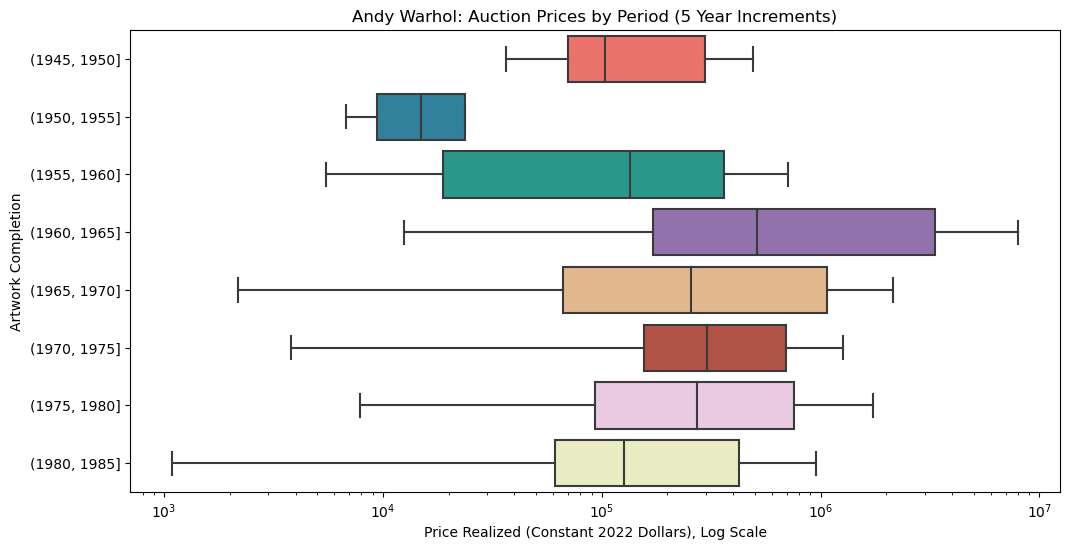

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(
    data=warhol,
    y=pd.cut(warhol['end_date'], bins=range(1945, 1990, 5)),
    x='price_realized_USD_constant_2022',
    showfliers=False,
    ax=ax
)

ax.set_title('Andy Warhol: Auction Prices by Period (5 Year Increments)');
ax.set_xlabel('Price Realized (Constant 2022 Dollars), Log Scale')
ax.set_ylabel('Artwork Completion')

ax.set_xscale('log');

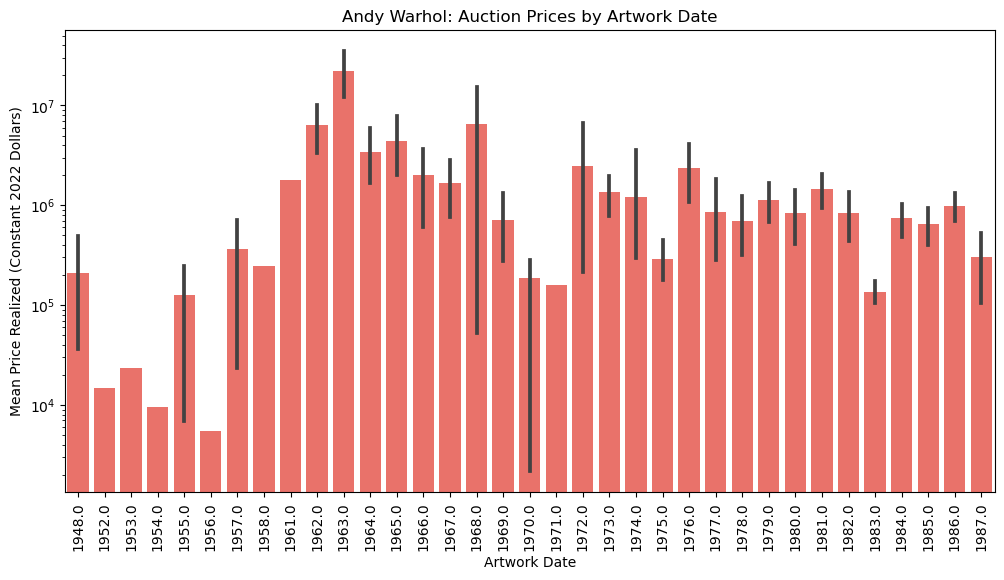

In [25]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(
    data=warhol.dropna(subset=['end_date', 'price_realized_USD_constant_2022']),
    x='end_date',
    y='price_realized_USD_constant_2022',
    ax=ax,
    palette=[pink for x in range(len(warhol['end_date'].unique()))]
)


ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=90)

ax.set_title('Andy Warhol: Auction Prices by Artwork Date')
ax.set_ylabel('Mean Price Realized (Constant 2022 Dollars)')
ax.set_xlabel('Artwork Date');

ax.set_yscale('log')

This is very interesting to me and makes total sense given the fact that certain bodies of work for which Warhol is rightfully famous were created during certain moments in time.

# Realized Price vs Artwork Age
How does price correlate with the artwork's age at the time of auction?

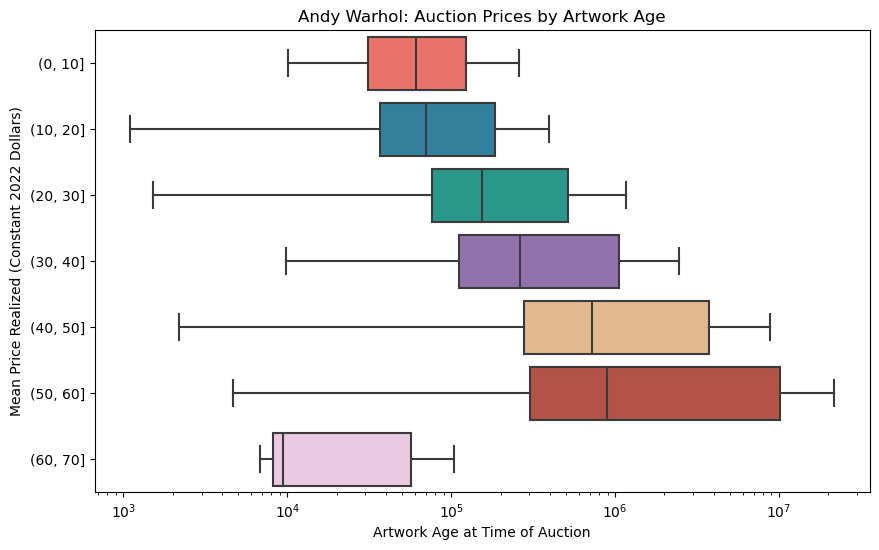

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(
    y=pd.cut(warhol['artwork_age_at_auction'], bins=range(0, 75, 10)),
    x=warhol['price_realized_USD_constant_2022'],
    ax=ax,
    showfliers=False
)


ax.set_title('Andy Warhol: Auction Prices by Artwork Age')
ax.set_ylabel('Mean Price Realized (Constant 2022 Dollars)')
ax.set_xlabel('Artwork Age at Time of Auction')

ax.set_xscale('log')

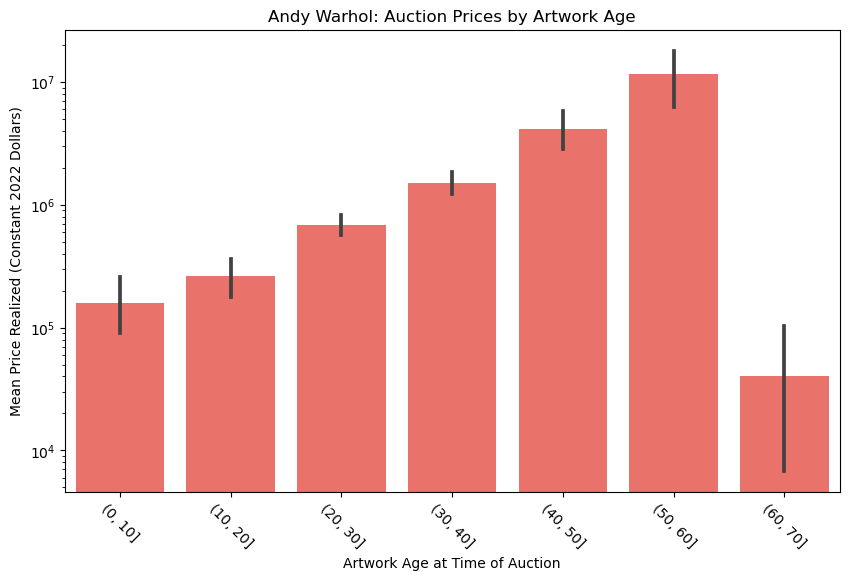

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    x=pd.cut(
        warhol.dropna(subset='price_realized_USD_constant_2022')['artwork_age_at_auction'], 
        bins=range(0, 75, 10)
    ),
    y=warhol['price_realized_USD_constant_2022'].dropna(),
    ax=ax,
    palette=[pink for x in range(10)]
)


ax.get_yaxis().set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))
ax.tick_params(axis='x', rotation=-45)

ax.set_title('Andy Warhol: Auction Prices by Artwork Age')
ax.set_ylabel('Mean Price Realized (Constant 2022 Dollars)')
ax.set_xlabel('Artwork Age at Time of Auction')

ax.set_yscale('log');

# Takeaways
- Target variable should be not `price_realized_USD` but its log.
- For dimensional variables (`width_cm`, `height_cm`, and `area_cm_sq`), the model should be trained on their log (although there doesn't appear to be much correlation here).
- With all the other features we examined, there do seem to be very real and noticible correlations with price, which makes me think we're on the right track for a functional model.